In [1]:
from modelscope.msdatasets import MsDataset
data_name = "BAAI/IndustryInstruction_Transportation"
dataset = MsDataset.load(data_name)
print(f"data:{dataset}")

2024-11-25 16:15:26,659 - modelscope - INFO - storing https://www.modelscope.cn/api/v1/datasets/BAAI/IndustryInstruction_Transportation/repo?Source=SDK&Revision=master&FilePath=industry_instruction_semantic_cluster_dedup_%E4%BA%A4%E9%80%9A%E8%BF%90%E8%BE%93_train.jsonl in cache at /mnt/workspace/.cache/modelscope/hub/datasets/downloads/3174e657ff03c10d586158b660c37b78682ec89482f1c228f08ad438bd042a9d
2024-11-25 16:15:26,751 - modelscope - INFO - creating metadata file for /mnt/workspace/.cache/modelscope/hub/datasets/downloads/3174e657ff03c10d586158b660c37b78682ec89482f1c228f08ad438bd042a9d
2024-11-25 16:15:27,953 - modelscope - INFO - storing https://www.modelscope.cn/api/v1/datasets/BAAI/IndustryInstruction_Transportation/repo?Source=SDK&Revision=master&FilePath=industry_instruction_semantic_cluster_dedup_%E4%BA%A4%E9%80%9A%E8%BF%90%E8%BE%93_valid_eval.jsonl in cache at /mnt/workspace/.cache/modelscope/hub/datasets/downloads/64d31e36ac13a227099a0db9e51c860119439bdebebd40be868982840c94

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

data:DatasetDict({
    train: Dataset({
        features: ['deita_score', 'rw_score', 'id', 'instruction', 'lang', 'length', 'conversations'],
        num_rows: 126328
    })
    validation: Dataset({
        features: ['deita_score', 'rw_score', 'id', 'instruction', 'lang', 'length', 'conversations'],
        num_rows: 500
    })
    test: Dataset({
        features: ['deita_score', 'rw_score', 'id', 'instruction', 'lang', 'length', 'conversations'],
        num_rows: 500
    })
})


In [2]:
dataset["train"]

Dataset({
    features: ['deita_score', 'rw_score', 'id', 'instruction', 'lang', 'length', 'conversations'],
    num_rows: 126328
})

In [3]:
dataset["train"][0]

{'deita_score': 7.9748881099,
 'rw_score': -7.96875,
 'id': 'generate_from_given_topic',
 'instruction': '',
 'lang': 'zh',
 'length': 11,
 'conversations': [{'from': 'human', 'value': '公共交通运输的发展如何影响经济？'},
  {'from': 'gpt',
   'value': '答案：<公共交通运输的发展对经济产生了深返影响。首先，它提供了就业机会，从而提升了就业率和经济增长。其次，公共交通也能提升商业活动，因为它让消费者和商家更容易相互交流。另外，公共交通还能减少交通堵塞，提高城市的运行效率，从而提高经济效率。最后，公共交通运输的发展也有助于环保，节约能源，这些都是可持续发展经济的重要方面。>'}]}

2024-11-19 09:31:59,821 - modelscope - INFO - Creating symbolic link /mnt/workspace/.cache/modelscope/hub/Qwen/Qwen2___5-0___5B-Instruct -> /mnt/workspace/.cache/modelscope/hub/Qwen/Qwen2.5-0.5B-Instruct.
2024-11-19 09:31:59,824 - modelscope - WARNING - Failed to create symbolic link /mnt/workspace/.cache/modelscope/hub/Qwen/Qwen2___5-0___5B-Instruct -> /mnt/workspace/.cache/modelscope/hub/Qwen/Qwen2.5-0.5B-Instruct: [Errno 17] File exists: '/mnt/workspace/.cache/modelscope/hub/Qwen/Qwen2___5-0___5B-Instruct' -> '/mnt/workspace/.cache/modelscope/hub/Qwen/Qwen2.5-0.5B-Instruct'


dataset: Dataset({
    features: ['deita_score', 'rw_score', 'id', 'instruction', 'lang', 'length', 'conversations'],
    num_rows: 126707
})


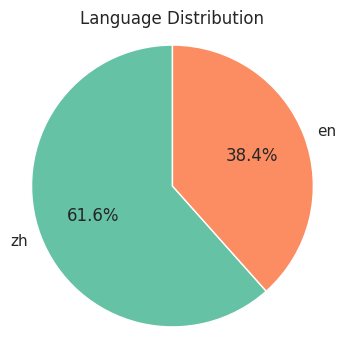

/tmp/ipykernel_581/887560138.py:38: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.ecdfplot(
/tmp/ipykernel_581/887560138.py:38: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.ecdfplot(
/tmp/ipykernel_581/887560138.py:38: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.ecdfplot(
/tmp/ipykernel_581/887560138.py:38: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.ecdfplot(
/tmp/ipykernel_581/887560138.py:38: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.ecdfplot(
/tmp/ipykernel_581/887560138.py:38: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.ecdfplot(


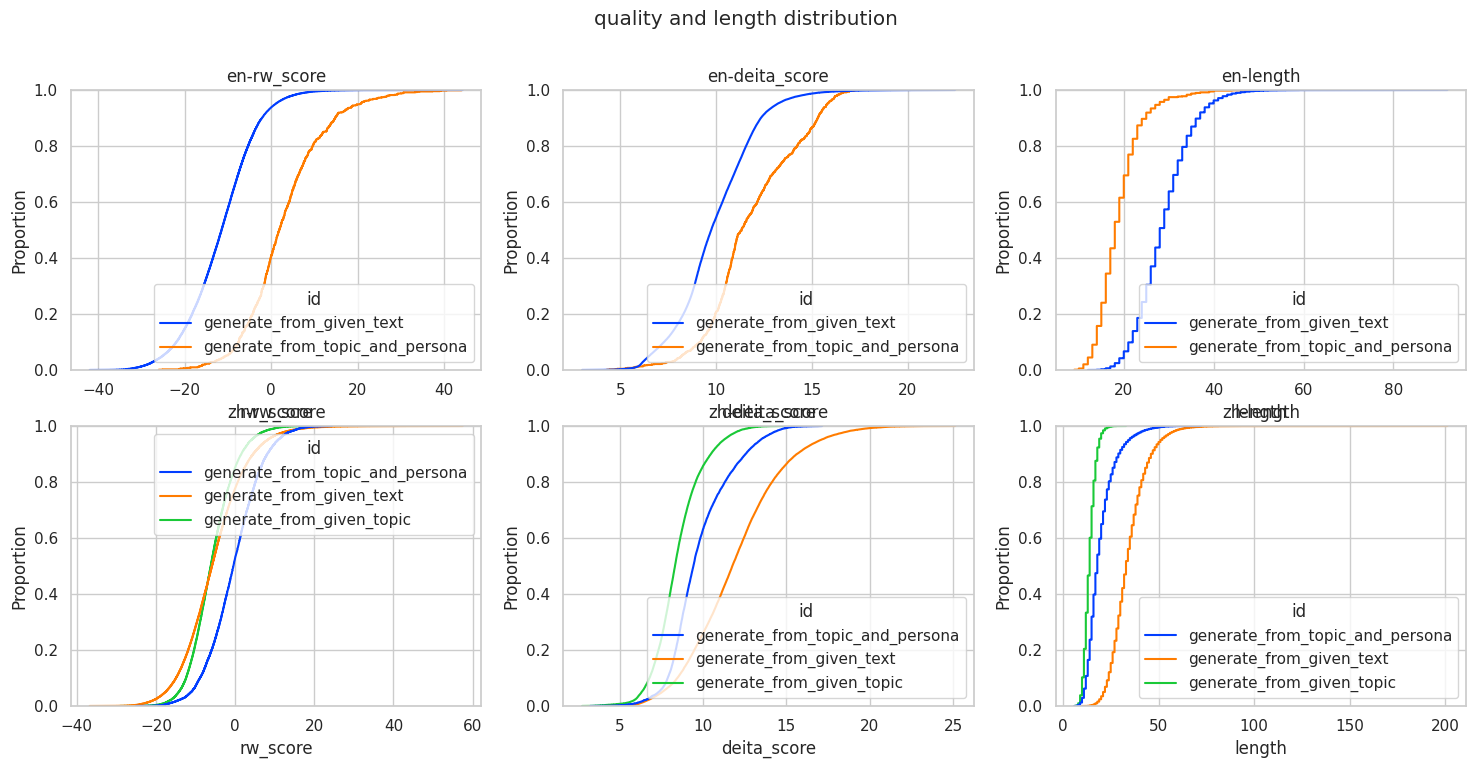

In [10]:
from modelscope import AutoTokenizer, AutoModelForCausalLM
import matplotlib.pyplot as plt
import seaborn as sns

model_name = "Qwen/Qwen2.5-0.5B-Instruct"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# 统计数据的质量分数分布
def quality_length_dist(data_name):
    dataset = MsDataset.load(
        data_name,
        split="train",
    )
    print(f"dataset: {dataset}")
    df_total = dataset.to_pandas()
    language_counts = df_total["lang"].value_counts()
    sns.set(style="whitegrid")
    plt.figure(figsize=(4, 4))
    plt.pie(
        language_counts,
        labels=language_counts.index,
        autopct="%1.1f%%",
        startangle=90,
        colors=sns.color_palette("Set2"),
    )
    plt.title(f"Language Distribution")
    plt.axis("equal")
    plt.show()

    fig, axes = plt.subplots(2, 3, figsize=(18, 8))

    for index, lang in enumerate(["en", "zh"]):
        df = df_total.loc[df_total["lang"] == lang]
        if df.empty:
            continue
        palette = sns.color_palette("bright", 5)
        for idx, name in enumerate(["rw_score", "deita_score", "length"]):
            sns.ecdfplot(
                df,
                x=name,
                hue="id",
                ax=axes.flatten()[index * 3 + idx],
                palette=palette,
            )
            axes.flatten()[index * 3 + idx].set_title(f"{lang}-{name}")
    fig.suptitle(f"quality and length distribution")
    plt.show()

quality_length_dist("BAAI/IndustryInstruction_Automobiles")

In [11]:
# 可以根据提供的质量分数进行数据筛选，或者加入个人定制化的数据构建策略，例如回复COT引入，低质过滤，prompt改写等，下面使用提供的质量分数进行数据筛选

dataset = dataset.filter(lambda example: example["deita_score"]>10 and example["rw_score"]>1,num_proc=24)
print(f"filtered dataset :{dataset}")

filtered dataset :DatasetDict({
    train: Dataset({
        features: ['deita_score', 'rw_score', 'id', 'instruction', 'lang', 'length', 'conversations'],
        num_rows: 8757
    })
    validation: Dataset({
        features: ['deita_score', 'rw_score', 'id', 'instruction', 'lang', 'length', 'conversations'],
        num_rows: 39
    })
    test: Dataset({
        features: ['deita_score', 'rw_score', 'id', 'instruction', 'lang', 'length', 'conversations'],
        num_rows: 39
    })
})
